![Jonny Gios - Unsplash](https://images.unsplash.com/photo-1677752793570-acb0b3c54542?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=774&q=80)

_Picture by [Jonny Gios on Splash](https://unsplash.com/photos/pa447fb59MI)_


# Introduction

This study aimed to explore the performance and points distribution in football leagues that are played by 20 teams (with 38 games played by each team in a season). It's still in its early stages, with so more possibilities and analyses to be made.

At first, I just wanted to check if grouped information of points scored by each team in a season end from several leagues would generate a histogram with a bell shape. Then it became clear that there's a lot to be analyzed in this dataset.

For standardizing purposes, I have sticked to **top-tier national leagues disputed by 20 teams, in seasons with 38 games played from 2003/04 to 2022/23**. This dataset could be expanded in the future.

This led to 99 seasons from seven different national leagues, making a dataset with 1980 rows. Data was extracted from [**OGOL**](https://www.ogol.com.br/).

Information from each league was stored in a different table, but all the tables had the same shape:

1.   **Rk** - The final ranking of a team at the end of the season;
2.   **League** - The league name;
3.   **Team** - Team name;
4.   **Pts** - Points scored at the end of the season;
5.   **W** - Number of matches won;
6.   **D** - Number of matches tied;
7.   **L** - Number of matches lost;
8.   **GF** - Goals for;
9.   **GA** - Goals against;
10.  **GD** - Goals for and against difference;
11.  **Year_End** - The year that season ended.



In [2]:
# starting the machines up
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read the CSV files and turn into Pandas DataFrames
brasileirao = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/dados/League Standings/Brasil-Brasileirao.csv'))
epl = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/dados/League Standings/England-Premier-League.csv'))
ligue1 = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/dados/League Standings/France-Ligue-1.csv'))
seriea = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/dados/League Standings/Italy-Serie-A.csv'))
laliga = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/dados/League Standings/Spain-LaLiga.csv'))
superlig = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/dados/League Standings/Turkey-Super-Lig.csv'))

# concatenate dataframes into a single dataframe
standings = pd.concat([brasileirao, epl, ligue1, seriea, laliga, superlig], ignore_index=True, join='inner')

# inspect the results
print(standings.head(5))
print(standings.info())

   Rk       League           Team  Pts   P   W   D   L  GF  GA  GD  Year_End
0   1  Brasileirao      São Paulo   78  38  22  12   4  66  32  34      2006
1   2  Brasileirao  Internacional   69  38  20   9   9  52  36  16      2006
2   3  Brasileirao         Grêmio   67  38  20   7  11  64  45  19      2006
3   4  Brasileirao         Santos   64  38  18  10  10  58  36  22      2006
4   5  Brasileirao         Paraná   60  38  18   6  14  56  49   7      2006
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rk        1980 non-null   int64 
 1   League    1980 non-null   object
 2   Team      1980 non-null   object
 3   Pts       1980 non-null   int64 
 4   P         1980 non-null   int64 
 5   W         1980 non-null   int64 
 6   D         1980 non-null   int64 
 7   L         1980 non-null   int64 
 8   GF        1980 non-null   int64 
 9   GA      

Ok, so now we have our flat file with 1980 rows and not a single null value.

First, let's find out how many seasons with 20 teams and 38 games were played on each league.

In [ ]:
print(standings.groupby('League').Year_End.nunique().sort_values(ascending=False))

League
LaLiga            21
Premier League    21
Ligue 1           20
Serie A           19
Brasileirao       17
Süper Lig          1
Name: Year_End, dtype: int64


While all of **LaLiga** and **Premier League** seasons in that period meets our standards, **The 2019/20 season of Ligue 1 was interrupted** due to the Covid-19 breakout.

**Serie A** has only started with the 20-team format in 2005 and **Brasileirao** in the following year. The Turkish **Süper Lig** has not a stable number of participants and only one season was played by 20 teams.

# Analysis

**Now let's plot all the points scored by all the teams in all seasons!**

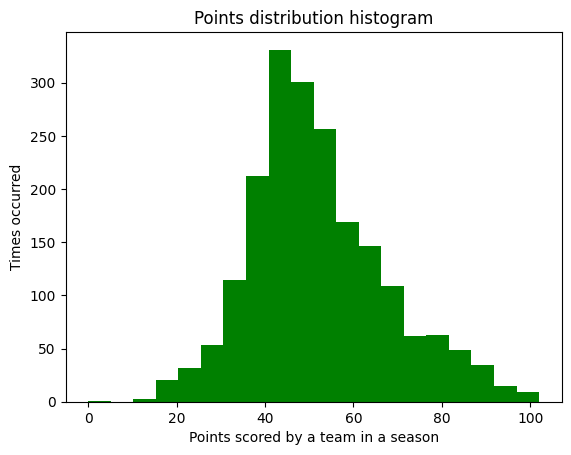

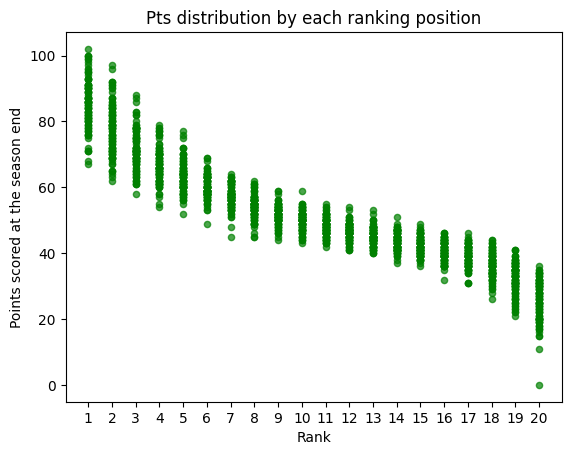

In [3]:
# first, a histogram
plt.hist(standings['Pts'], bins=20, histtype='bar', color='green')

plt.title('Points distribution histogram')
plt.xlabel('Points scored by a team in a season')
plt.ylabel('Times occurred')

plt.show()

# and then a scatter plot
standings.plot(x='Rk', y='Pts', c='green', kind='scatter', alpha=0.7)

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
plt.title('Pts distribution by each ranking position')
plt.xlabel('Rank')
plt.ylabel('Points scored at the season end')

plt.show()

Ok, we do have a nice bell shaped histogram, and the correlation between points scored and final season ranking is obvious.

But there's a crazy **outlier** at the right bottom of the scatter plot. ***Did a team really finished a season with zero points***?

In [4]:
# find out what team finished with not a single point
standings[standings['Pts'] == 0]

,Rk,League,Team,Pts,P,W,D,L,GF,GA,GD,Year_End
1199,20,Serie A,Juventus,0,38,27,10,1,71,24,47,2006


Juventus finished 2006 with zero points. But wait a minute! They won 27 matches and tied another ten. That should actually sum up 91 points!

How could that be? Is the dataset with wrong information?

No, it isn't!

![Calciopoli](https://i.ibb.co/RHpvhQM/stangatina.jpg)

# **Points deduction**

Sometimes, teams get penalyzed with points deduction after committing irregularities on or off the field.

One can remember the infamous [Calciopoli scandal](https://en.wikipedia.org/wiki/Calciopoli) in Italy in 2006, which made Juventus, Fiorentina and Lazio lose a lot of the points they had won through that season.

Juventus was actually relegated from Serie A to Serie B (just to make their way back to the top and win a lot of titles in the following years).

Although these point deductions are important facts, they do not reflect what really happened on the field and might interfere in real-life statistics.

**So let's investigate our dataset for penalyzed teams.**

In [5]:
# create a new column to calculate points based on number of wins and ties
standings['Pts_R'] = 3 * standings['W'] + standings['D']

# create another column to check if original points column is different from the new calculated column
standings['Was_Pen'] = np.where(standings['Pts'] == standings['Pts_R'], 'N', 'Y')

# check out which teams were penalyzed
standings[standings['Was_Pen'] == 'Y'].sort_values(['Rk', 'Pts_R'], ascending=[True, False])

,Rk,League,Team,Pts,P,W,D,L,GF,GA,GD,Year_End,Pts_R,Was_Pen
1182,3,Serie A,Milan,58,38,28,4,6,85,31,54,2006,88,Y
1202,3,Serie A,Lazio,62,38,18,11,9,59,33,26,2007,65,Y
842,3,Ligue 1,Toulouse,61,38,17,7,14,44,43,1,2007,58,Y
1203,4,Serie A,Milan,61,38,19,12,7,57,36,21,2007,69,Y
1124,5,Ligue 1,Nice,66,38,20,7,11,52,36,16,2022,67,Y
1205,6,Serie A,Fiorentina,58,38,21,10,7,62,31,31,2007,73,Y
1526,7,Serie A,Juventus,62,38,22,6,10,56,33,23,2023,72,Y
1127,8,Ligue 1,Lyon,61,38,17,11,10,66,51,15,2022,62,Y
1188,9,Serie A,Fiorentina,44,38,22,8,8,66,41,25,2006,74,Y
1311,12,Serie A,Atalanta,46,38,13,13,12,41,43,-2,2012,52,Y


In [6]:
# let's count that!
print(standings['Was_Pen'].value_counts())

N    1952
Y      28
Name: Was_Pen, dtype: int64


Nothing less than **28 teams had points deducted**! Most of them in Italy's Serie A.

**Now let's compare the scatter plots to see how that impacts on points distribution.**

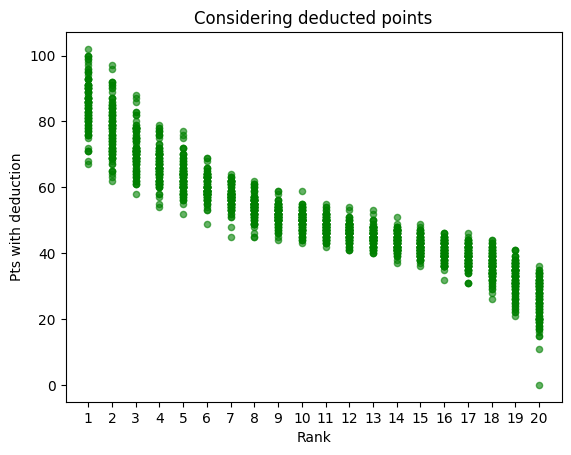

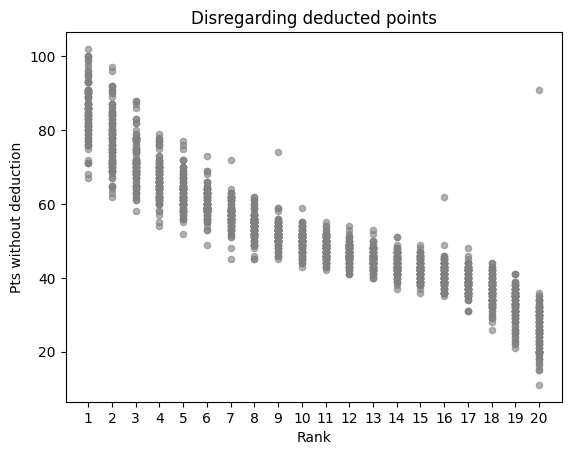

In [7]:
# Repeating the previous scatter plot, considering the deducted points
standings.plot(x='Rk', y='Pts', c='green', kind='scatter', alpha=0.6)

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
plt.title('Considering deducted points')
plt.xlabel('Rank')
plt.ylabel('Pts with deduction')

plt.show()

# Now let's make a new scatter plot with the new calculated column that disregards the deductions
standings.plot(x='Rk', y='Pts_R', c='grey', kind='scatter', alpha=0.6)

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
plt.title('Disregarding deducted points')
plt.xlabel('Rank')
plt.ylabel('Pts without deduction')

plt.show()

Now, some very notable outliers show up, because the points they won on the field are cleary not compatible with the position on which they finished the season after the punishment.

**Let's add some colors and make sure that the outliers are really from the teams that were punished.**

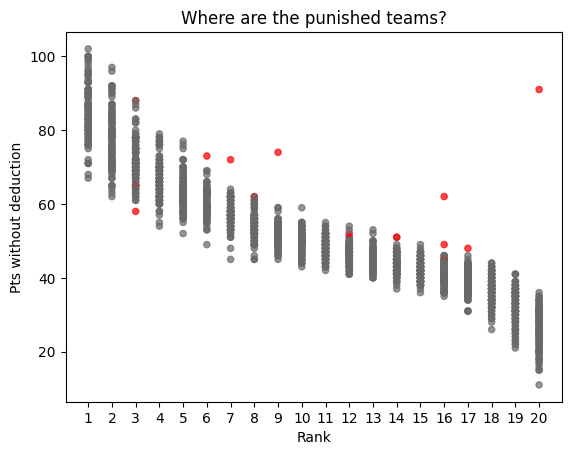

In [8]:
# add a column with color names: if the team was punished, its dot should be red; else, it should be grey.
standings['Was_Pen_c'] = np.where(standings['Was_Pen'] == 'Y', 'red', 'dimgray')

# and now let's plot it:
standings.plot(x='Rk', y='Pts_R', c='Was_Pen_c', kind='scatter', alpha=0.7)

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
plt.title('Where are the punished teams?')
plt.xlabel('Rank')
plt.ylabel('Pts without deduction')

plt.show()

Not a coincidence, **those three most dramatically isolated red dots belongs to the teams that were most heavily punished on the Calciopoli scandal** in the 2005/06 season of Serie A:

*   **Juventus**: 91 points before deduction, zero points after. Finished on the last position;
*   **Lazio**: 62 points before deduction, 32 points after. Finished on the 16th position;
*   **Fiorentina**: 74 points before deduction, 44 points after. Finished on the 9th position.

# Conclusion

With some plots and some basic filtering and data manipulation, we could find a few strange data points in the charts and grab insights from that.

A team finishing a league season with zero point is something very unlikely to happen. After finding this value on the dataset, we could investigate the reason for that and look for other similar data points.

From that, we could easily spot, on a scatter plot, the implications of one of the most important scandals in club football in the last decades.

***P.S: If you have eyes for data, you might have also spotted this:***

![scatter](https://i.ibb.co/7JQWx5r/comparison.png)

While the best 5th place had scored more points than several season champions, the champion with less points would incredibly finish only in the 7h place of a couple of league seasons. We will investigate that further in a next notebook.